In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Thresholding

Thresholding is a form of image segmentation where we replace pixel values that fall above/below a certain threshold.

## Simple Thresholding

On a grayscale image, make pixel values black if their intensity is below some threshold and white otherwise

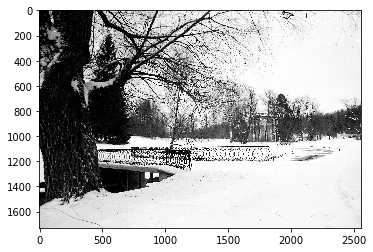

In [133]:
imbridge = cv2.imread('bridge.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imbridge, cmap='gray')

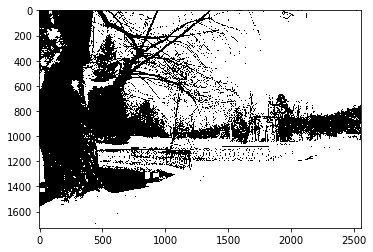

In [134]:
binaryimage = imbridge > 100
plt.imshow(binaryimage, cmap='gray')

## Color Thresholding
If we want to threshold a color image, converting to HSV from BGR will make our lives much easier

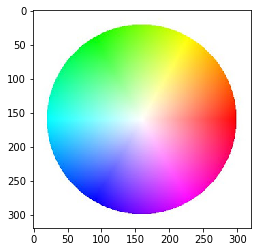

In [135]:
colorwheel = cv2.imread('hsv.jpg')
colorwheel = colorwheel[:,:,::-1] # convert to RGB
plt.imshow(colorwheel)

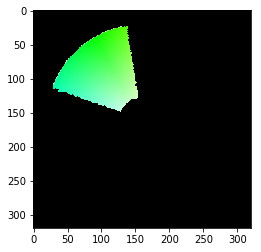

In [136]:
hsv = cv2.cvtColor(colorwheel, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, (50, 60, 0), (80, 255, 255))

thresholded = cv2.bitwise_and(colorwheel, colorwheel, mask=mask)
plt.imshow(thresholded)

## Thresholding Exercise

Take the color wheel image above and use thresholding to only show red and yellow

In [137]:
# TODO

# Grab Cut Algorithm

A more advanced algorithm to separate background from foreground. You do not need to worry about how the algorithm works.

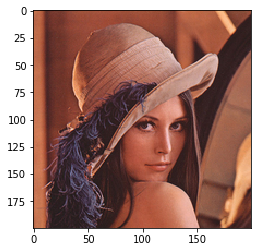

In [138]:
imlena = cv2.imread('lena.jpg')
imlena = imlena[:,:,::-1]
plt.imshow(imlena)

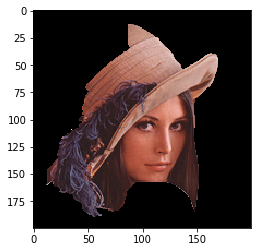

In [139]:
mask = np.zeros(imlena.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (10,10,180,180)
cv2.grabCut(imlena, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8') # 0 or 2 are background in the mask
imlena2 = cv2.bitwise_and(imlena, imlena, mask=mask2)
plt.imshow(imlena2)

## Grab Cut Exercise
Take the image of the puppy below and use the grab/cut algorithm to segment the puppy and the yellow toy then make the background purple.

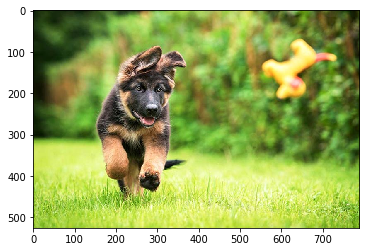

In [140]:
imdog = cv2.imread('dog.jpg')
imdog = cv2.cvtColor(imdog, cv2.COLOR_BGR2RGB)
plt.imshow(imdog)